<a href="https://colab.research.google.com/github/TChen90/TensorFlow/blob/master/The_mathematical_building_blocks_of_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Loading the MNIST dataset in Keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

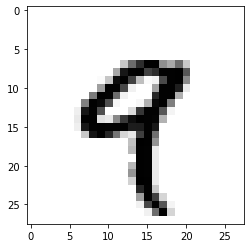

In [5]:
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [7]:
print(train_labels[4])
train_images[4]

9


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [0]:
test_images.shape

(10000, 28, 28)

In [0]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [0]:
# The network architecture
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential([
  layers.Dense(512, activation='relu'),
  layers.Dense(10, activation='softmax')
])

In [0]:
# The compilation step
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
# Preparing the image data
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [0]:
# "Fitting" the model
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 11ms/step - loss: 0.2570 - accuracy: 0.9259
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1023 - accuracy: 0.9693
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0677 - accuracy: 0.9800
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0484 - accuracy: 0.9856
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0364 - accuracy: 0.9891


In [0]:
# Using the model to make predictions
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

array([2.4726708e-08, 4.4196067e-11, 4.6647691e-07, 1.1409312e-05,
       1.9443264e-12, 1.4949613e-08, 3.7590733e-14, 9.9998748e-01,
       2.4270845e-08, 5.2708447e-07], dtype=float32)

In [0]:
predictions[0].argmax()

7

In [0]:
predictions[0][7]

0.9999875

In [0]:
test_labels[0]

7

In [0]:
# Evaluating the model on new data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0697 - accuracy: 0.9798
test_acc: 0.9797999858856201
